# Red threat summary

## Preliminary

In [1]:
# imports

# %load_ext autoreload
# %autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd

from HANKStickyModel import HANKStickyModelClass

In [2]:
# solve example models

updated_par = {'phi_G': 0.5,         # mixed financing of fiscal policy shock
                'jump_eg': 0.01,    # 1% government spending shock
                'rho_eg': 0.7,
                'jump_em': 0.0}
model = HANKStickyModelClass(name='baseline', par={**updated_par ,**{'inattention': 0.0}})
print("\r"+'Find steady state  ',end="")
model.find_ss(do_print=False)
# model without sticky information
print("\r"+'Compute Jacobians (no sticky) ',end="")
model.compute_jacs(do_print=False)
# print("\r"+'Find transition path (no sticky)',end="")
# model.find_transition_path(do_print=False, do_print_unknowns=False)
# print("\r"+'Find IRFs (no sticky)          ',end="")
# model.find_IRFs(do_print=False)

# model with sitcky information
model_sticky = model.copy()
model_sticky.par.inattention = 0.935
print("\r"+'Compute Jacobians (sticky)    ',end="")
model_sticky.compute_jacs(do_print=False)
# print("\r"+'Find transition path (sticky)    ',end="")
# model_sticky.find_transition_path(do_print=False, do_print_unknowns=False)
# print("\r"+'Find IRFs (sticky)               ',end="")
# model_sticky.find_IRFs(do_print=False)
print("\r"+'Done                     ',end="")

Compute Jacobians (sticky)    

# Research question:
How do sticky information for household affect the transmission of fiscal policy in a quantitative HANK model?

To answer the research question, I could motivate in the following steps:
1. Why sticky information?
2. Sticky information and interaction of fiscal policy.
3. Analysis of fiscal policy in a quantitative HANK with sticky information.

# 1. Motivating sticky information

- As Auclert, Rognlie, and Straub (2020) show, sticky information can help to match the sluggish response to aggregate shocks (macro moments) while matching the consumption response to this shock (micro moments). This helps to match the hump shaped response to a monetary policy shock, while matching iMPCs.

- In the thesis, I want to analyze how this information rigidity affects the transmission of fiscal policy shocks. For this I first need to establish how the sticky information affects the transmission of shocks.

## Sluggish response to transitory income shocks.

Sticky information reduces intertemporal substitution and income effects in response to a shock. For a household whose information have not adjusted, the reaction to a shock will then be delayed until he receives additional income. This leads to a hump shaped response in consumption.
This can be illustraded using the partial equilibrium response to persistent shocks of household inputs.

In [28]:
def plot_PE_hh(model_list, label_list, compare_outputs, compare_inputs, plot_periods, shocks_jump, shocks_rho):

    nrows = len(compare_outputs)
    ncols = len(compare_inputs)

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 4*nrows), dpi=100)

    fig = plotter_PE(fig, model_list, label_list, compare_outputs, compare_inputs, plot_periods, shocks_jump, shocks_rho)

    return fig

def plotter_PE(fig, model_list, label_list, compare_outputs, compare_inputs, plot_periods, shocks_jump, shocks_rho, linestyle='-'):

    fig_i = 0
    for output in compare_outputs:
        for i_s, shock in enumerate(compare_inputs):

            T = np.array([m.par.T for m in model_list]).min()
            shock_series =  shocks_jump[i_s]*shocks_rho[i_s]**np.arange(T)

            ax = fig.axes[fig_i]
            fig_i += 1
            ax.set_title(f'{shock}_shock on {output} (in %)')

            for i_m, m in enumerate(model_list):
                IRF_abs = m.jac_hh[(output, shock)] @ shock_series
                IRF_perc = (IRF_abs / m.ss.__dict__[output]) * 100
                # plot
                ax.plot(np.arange(plot_periods), IRF_perc[:plot_periods], label=label_list[i_m], linestyle=linestyle)
            ax.legend()

    return fig


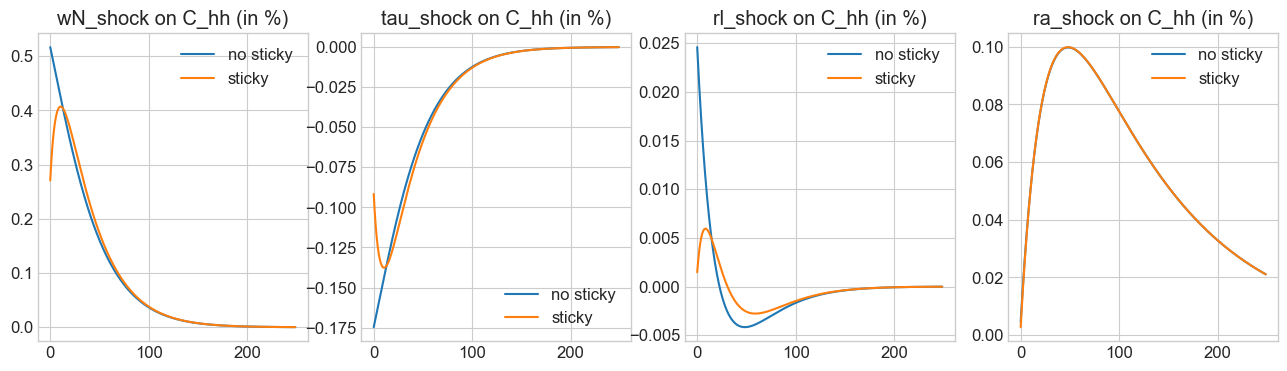

In [29]:
model_list = [model, model_sticky]
label_list = ['no sticky', 'sticky']

compare_outputs = ['C_hh']
compare_inputs = ['wN', 'tau', 'rl', 'ra']

plot_periods = model.par.T

# 1 % jump in income
ss = model_sticky.ss

shocks_jump = [0.01 * ss.wN, 0.01 * ss.tau, 0.01 * ss.rl, 0.01 * ss.ra]
shocks_rho =[0.966, 0.966, 0.966, 0.966]

_ = plot_PE_hh(model_list, label_list, compare_outputs, compare_inputs, plot_periods, shocks_jump, shocks_rho)

One important note is that the humps are highly dependent on the persistence of the shock. If the shocks are not highly persistent, income and substitution effects are muted and so in the the impact of sticky information.

Illustration of this using different persistence levels:

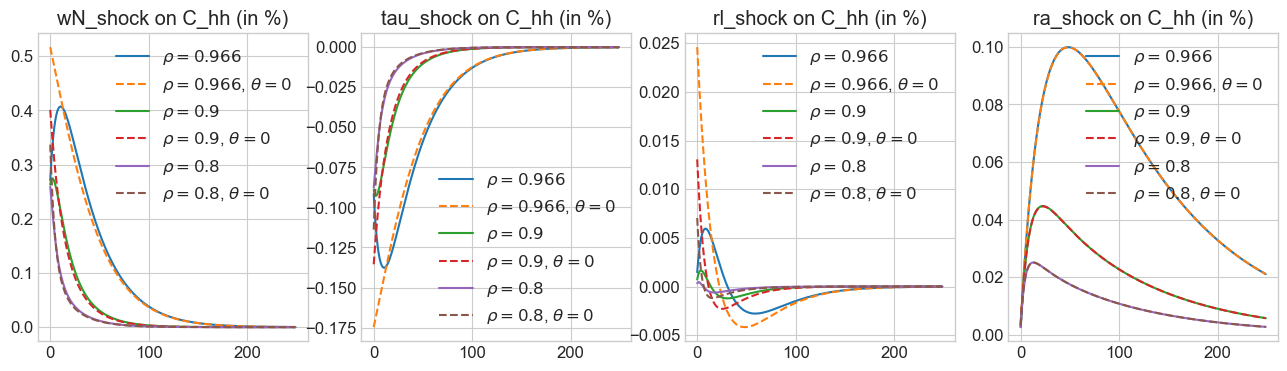

In [33]:
compare_outputs = ['C_hh']
compare_inputs = ['wN', 'tau', 'rl', 'ra']

plot_periods = model.par.T

# 1 % jump in income
ss = model_sticky.ss

shocks_jump = [0.01 * ss.wN, 0.01 * ss.tau, 0.01 * ss.rl, 0.01 * ss.ra]
shocks_rho =[0.966, 0.966, 0.966, 0.966]

fig = plot_PE_hh([model_sticky], ['$\\rho = 0.966$'], compare_outputs, compare_inputs, plot_periods, shocks_jump, shocks_rho)
fig = plotter_PE(fig, [model], ['$\\rho = 0.966$, $\\theta=0$'], compare_outputs, compare_inputs, plot_periods, shocks_jump, shocks_rho, linestyle='--')

shocks_rho =[0.9, 0.9, 0.9, 0.9]
fig = plotter_PE(fig, [model_sticky], ['$\\rho = 0.9$'], compare_outputs, compare_inputs, plot_periods, shocks_jump, shocks_rho)
fig = plotter_PE(fig, [model], ['$\\rho = 0.9$, $\\theta=0$'], compare_outputs, compare_inputs, plot_periods, shocks_jump, shocks_rho, linestyle='--')
# #
shocks_rho =[0.8, 0.8, 0.8, 0.8]
fig = plotter_PE(fig, [model_sticky], ['$\\rho = 0.8$'], compare_outputs, compare_inputs, plot_periods, shocks_jump, shocks_rho)
fig = plotter_PE(fig, [model], ['$\\rho = 0.8$, $\\theta=0$'], compare_outputs, compare_inputs, plot_periods, shocks_jump, shocks_rho, linestyle='--')


For more details regarding the at the source of the sluggish response one can look at the household Jacobians.

In [31]:
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

def plot_jacs(model, s_list=None, dx=1e-4, inputs_outputs=[], max_T=model.par.T):
    """ compute and plot hh Jacobians with direct and fake news method
        - difference to GEModelTools function: plot only selected Jacobians.

        :param input_output: Jacobians to plot as list of elements in the form of ('outputname', 'inputname')."""

    model_jac_temp = deepcopy(model.jac_hh)    # save original model jacs and replace again later as not all Jacobians might be caluclated

    if s_list is None:
        s_list = list(np.arange(0, max_T, max_T // 4))

    print('note: differences should only be due to numerical errors\n')

    if model.par.inattention > 0:
        print(f'household inattention = {model.par.inattention}')
        print('-> sticky information jacs based on direct method correspond to the jacs without sticky information.')

    if len(inputs_outputs) > 0:
        inputs_hh_all = set([inp[1] for inp in plot_list if inp[1]])
    else:
        inputs_hh_all = model.inputs_hh_all

    # a. direct
    print('direct method:')
    model._compute_jac_hh(dx=dx, do_print=True, do_direct=True, s_list=s_list, inputs_hh_all=inputs_hh_all)
    jac_hh_direct = deepcopy(model.jac_hh)

    # b. fake news
    print(f'\nfake news method:')
    model._compute_jac_hh(dx=dx, do_print=True, do_direct=False, inputs_hh_all=inputs_hh_all)
    if model.par.inattention > 0:
        model.jac_hh = model._compute_sticky_jacs_hh(model.jac_hh)

    # c. compare

    def jac_add_subplot(input_output, n_inputs_outputs):
        jac_hh_var_direct = jac_hh_direct[input_output]
        jac_hh_var = model.jac_hh[input_output]

        ax = fig.add_subplot(n_inputs_outputs, 2, i * 2 + 1)
        ax_diff = fig.add_subplot(n_inputs_outputs, 2, i * 2 + 2)

        ax.set_title(f'Jac {input_output}')
        ax_diff.set_title(f'... difference (fake news - direct)')

        for j, s in enumerate(s_list):
            ax.plot(np.arange(max_T), jac_hh_var_direct[:max_T, s], color=colors[j], label=f'shock at {s}')
            ax.plot(np.arange(max_T), jac_hh_var[:max_T, s], color=colors[j], ls='--', label='fake news')

            diff = jac_hh_var[:max_T, s] - jac_hh_var_direct[:max_T, s]
            ax_diff.plot(np.arange(max_T), diff, color=colors[j])

            # print(f'{input_output}, s={s}')
            # print(f"max abs diff in consumption from one unit shock: {abs(diff).max()}")
            # print(f"in % from no sticky case: {abs(diff).max()/jac_hh_var_direct[abs(diff).argmax(), s]}")
            list_diffs.append([
                f'{input_output}, s={s}',
                abs(diff).max(),
                (abs(diff).max()/ abs(jac_hh_var_direct[abs(diff).argmax(), s])) * 100
            ])

        return ax

    list_diffs = [["Jac",
                  "max abs diff in C_hh from one unit shock",
                  "max % diff in C_hh from no sticky case"]]

    i = 0

    if len(inputs_outputs) == 0:
        fig = plt.figure(figsize=(6 * 2, len(model.outputs_hh) * len(model.inputs_hh_all) * 4), dpi=100)

        n_inputs_outputs = len(model.inputs_hh_all) * len(model.outputs_hh)
        for inputname in model.inputs_hh_all:
            for outputname in model.outputs_hh:

                input_output = (f'{outputname.upper()}_hh', inputname)

                ax = jac_add_subplot(input_output, n_inputs_outputs)

                if i == 0: ax.legend(frameon=True)
                i += 1
    else:
        fig = plt.figure(figsize=(6 * 2, len(inputs_outputs)*4), dpi=100)

        n_inputs_outputs = len(inputs_outputs)
        for input_output in inputs_outputs:

            ax = jac_add_subplot(input_output, n_inputs_outputs)

            if i == 0: ax.legend(frameon=True)
            i += 1

    model.jac_hh = model_jac_temp

    return list_diffs

note: differences should only be due to numerical errors

household inattention = 0.935
-> sticky information jacs based on direct method correspond to the jacs without sticky information.
direct method:
finding Jacobian wrt. ghost          : 0 3 7 20 40 [computed in 9.6 secs]
finding Jacobian wrt. tau            : 0 3 7 20 40 [computed in 8.3 secs]
finding Jacobian wrt. rl             : 0 3 7 20 40 [computed in 8.9 secs]
finding Jacobian wrt. wN             : 0 3 7 20 40 [computed in 7.9 secs]
household Jacobian computed in 35.4 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for tau             in 3.7 secs
curly_Y and curly_D calculated for rl              in 3.7 secs
curly_Y and curly_D calculated for wN              in 3.7 secs
curly_E calculated in 2.4 secs
builiding blocks combined in 0.8 secs
household Jacobian computed in 14.5 secs


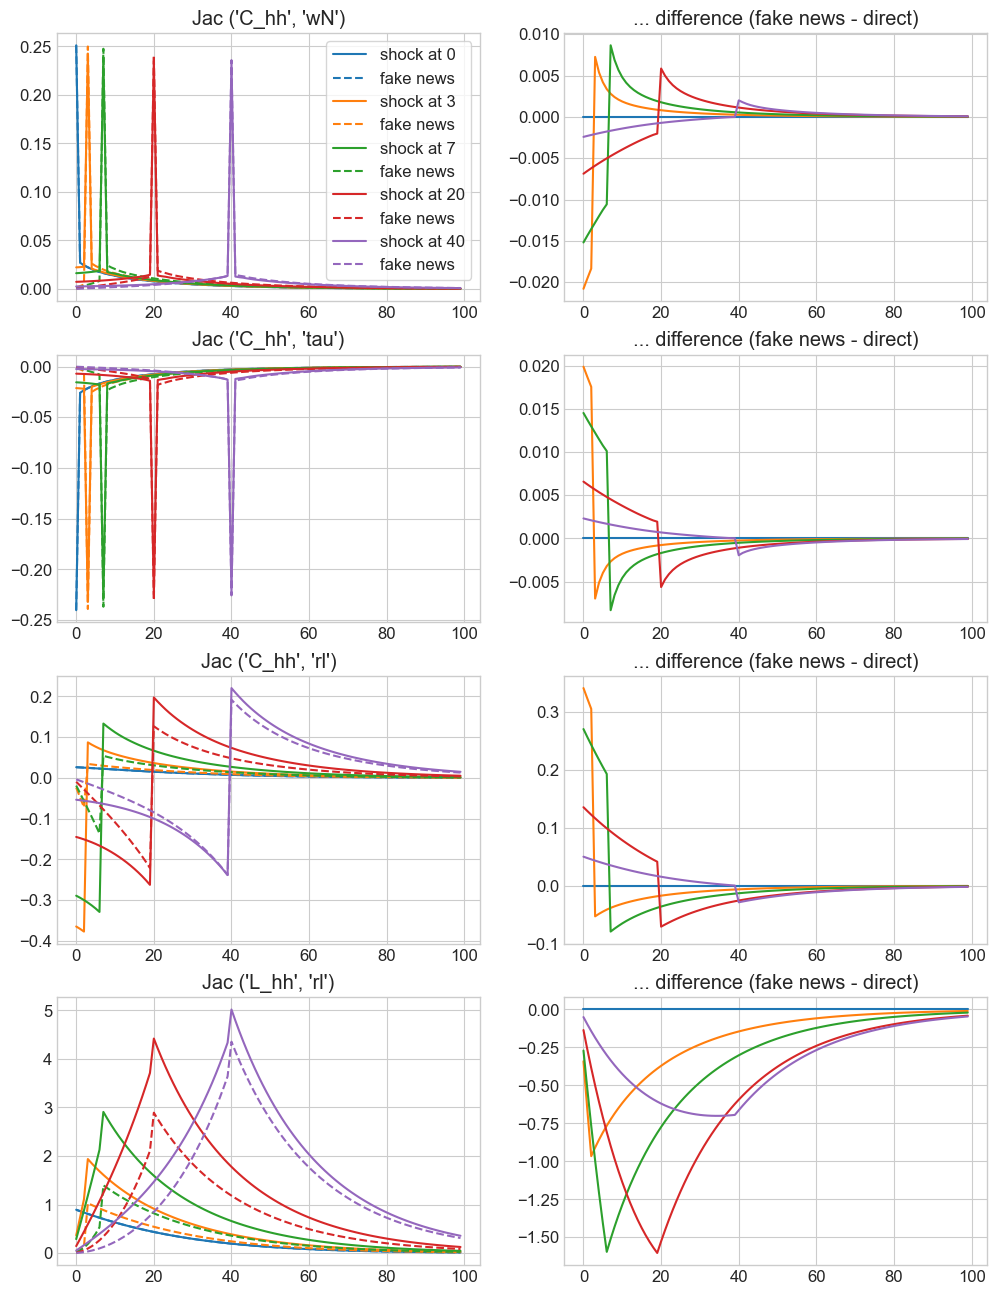

In [32]:
s_list = [0,3,7,20,40]
plot_list = [('C_hh', 'wN'),
             ('C_hh', 'tau'),
             ('C_hh', 'rl'),
             ('L_hh', 'rl')]
list_diffs = plot_jacs(model_sticky, s_list=s_list, max_T=100, inputs_outputs=plot_list)

Example: shock to the aggregate pre-tax labor income in one year (C_hh, wN):

- In the initial period, there is no difference in the Jacobians as the sticky information only matters for future shocks.
- In case of a shock that happens in the next year (s=3), the RHS of the graph shows that there is a difference in the consumption reactions:
    -  In t=0, there is less consumption in case of sticky information.  This reflects the reduced magnitude of the income effect  and directly follows from the level of inattention.
    -  In t=3, when the shock hits the economy, the consumption increase is stronger as less consumption adjustment has taken place yet.

- Potential To-Do:
    - To properly account for the consumption differences through the sticky information in the case of future shocks I would have to simulate the consumption path to a one-time shock.

The table below is only a test. It mainly illustrates that in the case of a future shock, the difference in consumption depends on the level of inattention and that there is no difference if the shock is at s=0.

Add parts about?:
- iMPC
- investment (not sure how much room I have to give to this yet)

In [34]:
# differences in jacobians
pd.DataFrame(list_diffs[1:], columns=list_diffs[0]).round(3)

,Jac,max abs diff in C_hh from one unit shock,max % diff in C_hh from no sticky case
0,"('C_hh', 'wN'), s=0",0.000,0.000
1,"('C_hh', 'wN'), s=3",0.021,93.500
2,"('C_hh', 'wN'), s=7",0.015,93.500
3,"('C_hh', 'wN'), s=20",0.007,93.500
4,"('C_hh', 'wN'), s=40",0.002,93.500
5,"('C_hh', 'tau'), s=0",0.000,0.000
6,"('C_hh', 'tau'), s=3",0.020,93.500
7,"('C_hh', 'tau'), s=7",0.015,93.500
8,"('C_hh', 'tau'), s=20",0.007,93.500
9,"('C_hh', 'tau'), s=40",0.002,93.500


# 2. Sticky information and interaction with fiscal policy.

- Auclert, Rognlie, and Straub (2020) show, that the sticky information has two effects on the consumption response. First, it decreases the direct effect (effects from changes in liquid return) from interest rate changes even more and it creates a hump-shaped response in the indirect effect (effect on the other two income sources - labor and illiquid asset income).


- Fiscal policy shocks are different to monetary policy shocks as they have a more direct impact on demand. An increase in government spending increases demand directly, which in turn increases labor demand and thus employment and wages. The higher labor income for households translates into higher consumption which in turn increases aggregate demand and so on.


- In relation to household consumption, a fiscal policy shock has a direct impact through changes in the tax rate and indirect effects through the demand side effects.

    – Depending on the fiscal policy setting, the tax rate response can be quite substantial. For instance given a fiscal policy shock under a balanced budget rule. Again, sticky information interferes with the income and substitution effect from this tax rate change as household do not have perfect information on the path of the tax rate.


- In short, it is relevant to analyze the effect of sticky information in the context of fiscal policy as it alters the transmssion of the direct and indirect effect.

Structure of this part:
1. Consumption decomposition after a fiscal policy shock to illustrate effects.
2. Explain transmission of fiscal policy by
    - decomposing output response
    - highlighting role of iMPCs?

Before analyzing the response to the fiscal policy shock, first specify the shock and get the IRFs after the shock.
The baseline shock has the following properties:


Shock properties
jump_eg = 0.01
rho_eg = 0.7
phi_G = 0.5

 Calculate IRFs
linear transition path found in 0.1 secs [finding solution matrix: 0.1 secs]
linear transition path found in 0.1 secs [finding solution matrix: 0.1 secs]


Text(0.5, 1.0, 'Fiscal policy shock trajectory')

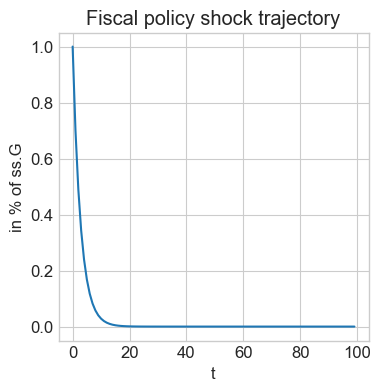

In [4]:
# shock properties
print("Shock properties")
properties = ['jump_eg', 'rho_eg', 'phi_G']
for p in properties:
    assert model_sticky.par.__dict__[p] == model.par.__dict__[p]
    print(f"{p} = {model.par.__dict__[p]}")
# assert other shocks are zero
for e in model.shocks:
    assert model_sticky.par.__dict__[f"jump_{e}"] == model.par.__dict__[f"jump_{e}"] if e != 'eg' else True
    assert model_sticky.par.__dict__[f"jump_{e}"] == 0.0 if e != 'eg' else True, f"jump_{e} = " + str(model_sticky.par.__dict__[f"jump_{e}"])

# calculate IRFs
print("\n Calculate IRFs")
model.find_IRFs(do_print=True)
model_sticky.find_IRFs(do_print=True)

assert (model.path.eg == model_sticky.path.eg).all()

# plot shock trajectory
T_max = 100
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(np.arange(T_max) ,model.path.eg[0,:T_max]*100)
ax.set_xlabel('t')
ax.set_ylabel('in % of ss.G')
ax.set_title('Fiscal policy shock trajectory')

## Consumption decomposition after a fiscal policy shock.
The consumption function for household can be expressed as $C_{t}=\mathcal{C}_{t}\left(\{r_{s}^{\ell},r_{s}^{a},Z_{s}\}\right)=\mathcal{C}_{t}\left(\{r_{s}^{\ell},r_{s}^{a},\tau_{s},w_{s},N_{s}\}\right)$ and decomposed into changes in the interest rates, taxes and pre-tax labor income.
$$dC_{t}=\sum_{s}\frac{\partial\mathcal{C}_{t}}{\partial r_{s}^{\ell}}dr_{s}^{\ell}+\sum_{s}\frac{\partial\mathcal{C}_{t}}{\partial r_{s}^{a}}dr_{s}^{a}+\sum_{s}\frac{\partial\mathcal{C}_{t}}{\partial\tau_{s}}d\tau_{s}+\sum_{s}\frac{\partial\mathcal{C}_{t}}{\partial w_{s}N_{s}}dw_{s}N_{s}$$

In [77]:
def decompose_hh_path(model, output='c', do_print=False, use_inputs=None):
    """ decompose household transition path for consumption wrt. inputs or initial distribution
        --> already implemented in GEModelClass?"""

    jac_hh = model.jac_hh
    IRF = model.IRF

    # a. set inputs and outputs

    assert output in model.outputs_hh
    Outputname_hh = f"{output.upper()}_hh"

    if use_inputs is None:
        use_inputs_list = []
    elif use_inputs == 'all':
        use_inputs_list = model.inputs_hh_all
    else:
        if isinstance(use_inputs, str):
            use_inputs_list = [use_inputs]
        else:
            use_inputs_list = use_inputs

    if do_print:
        print(f"inputs: {use_inputs_list}")

    # b. get consumption response
    pathvalue = np.zeros_like(IRF[Outputname_hh])
    for inputname in use_inputs_list:
        d_input = IRF[inputname]
        assert not np.isnan(d_input).any()
        assert not np.isnan(model.jac_hh[(Outputname_hh, inputname)]).any()
        pathvalue += jac_hh[(Outputname_hh, inputname)] @ d_input

    return pathvalue

In [78]:
def plot_decomposition(path_list, labels=[], output='c', T_max=None, diff=False):
    """ Plot decomposition of household consumption."""

    ncols = len(path_list)
    if diff and len(path_list)>2:
        print('Diff only possible for 2 models')
        diff = False
    elif diff:
        ncols += 1

    Outputname_hh = f"{output.upper()}_hh"
    assert all([Outputname_hh in p for path in path_list for p in path.keys()]), 'Output not in all decomposed paths'

    if T_max is None:
        T_max = min([p.shape[0] for path in path_list for p in path['C_hh'].values()])

    fig = plt.figure(figsize=(4*ncols, 6),dpi=100)
    i = 0
    for paths in path_list:
        ax = fig.add_subplot(1,ncols,i+1)
        if len(labels) == ncols:
            ax.set_title(labels[i],fontsize=14)
        for inputname in paths[Outputname_hh].keys():
            inputname_IRF = paths[Outputname_hh][inputname]
            ax.set_ylabel(f'% of s.s. {Outputname_hh}')
            ss_output = model.ss.__dict__[Outputname_hh]
            assert not np.isclose(ss_output, 0.0).any()
            ax.plot(np.arange(T_max), (inputname_IRF[:T_max]/ss_output) * 100,label=inputname)
        ax.legend()
        i += 1

    if diff:
        ax = fig.add_subplot(1,ncols,i+1)
        ax.set_title('diff',fontsize=14)
        for inputname in paths[Outputname_hh].keys():
            diff = path_list[0][Outputname_hh][inputname][:T_max] - path_list[1][Outputname_hh][inputname][:T_max]
            ax.plot(np.arange(T_max), diff,label=inputname)
        ax.legend()

In [79]:
decomp_path_no_sticky = {'C_hh': {}}
decomp_path_sticky = {'C_hh': {}}
for i in ['ra', 'rl', 'tau', 'wN', 'all']:
    print(f'input: {i}')
    decomp_path_no_sticky['C_hh'][str(i)] = decompose_hh_path(model,output='c',use_inputs=i,do_print=False)
    decomp_path_sticky['C_hh'][str(i)] = decompose_hh_path(model_sticky,output='c',use_inputs=i ,do_print=False)


input: ra
input: rl
input: tau
input: wN
input: all


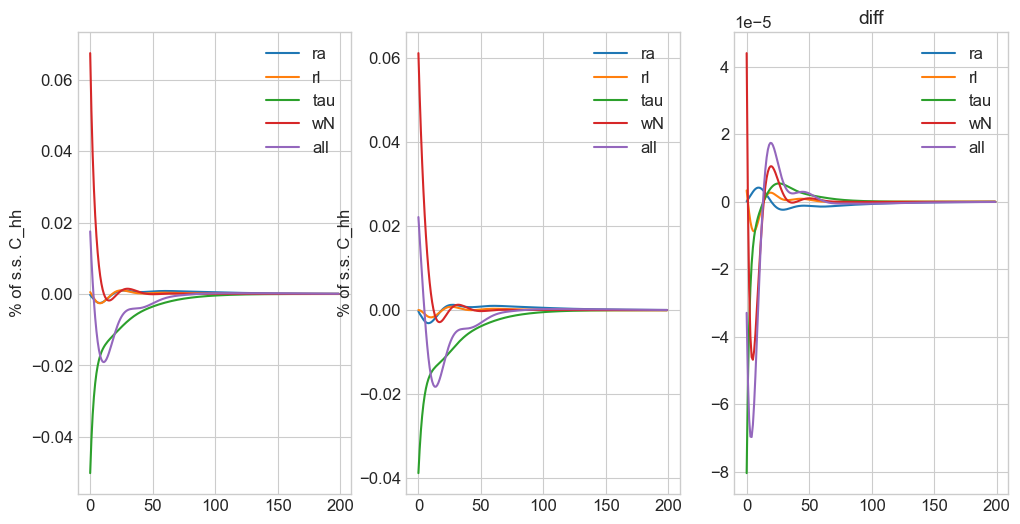

In [80]:
path_list = [decomp_path_no_sticky, decomp_path_sticky]
plot_decomposition(path_list, output='c', T_max=200, labels=['no sticky', 'sticky'], diff=True)

### shocks ###


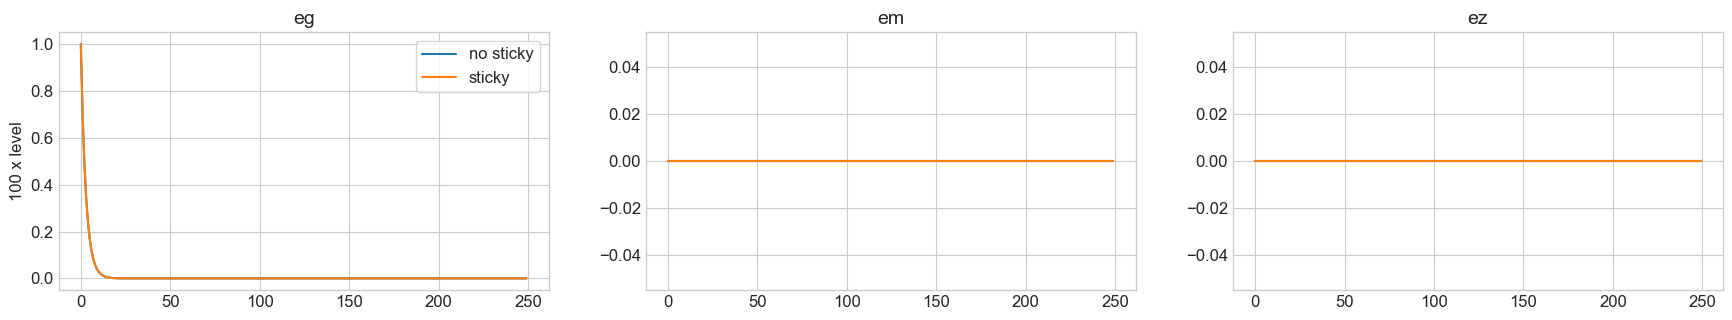


### varnames ###


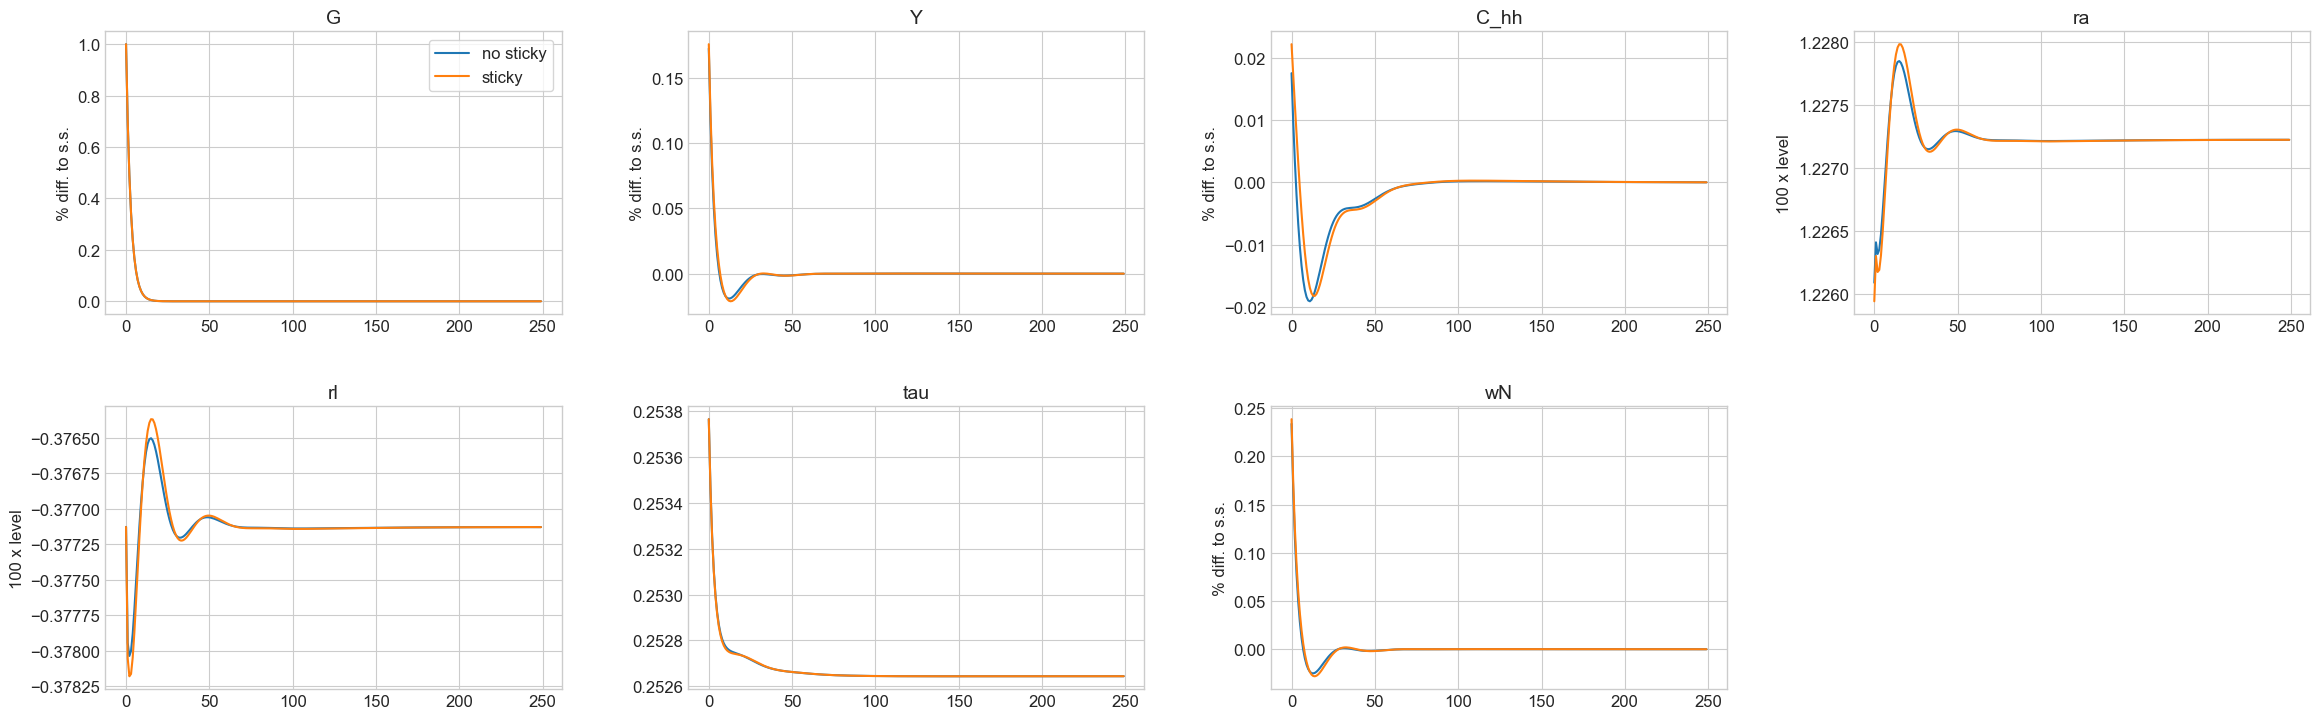

In [15]:
models = [model, model_sticky]
labels = ['no sticky', 'sticky']
paths = ['G', 'Y', 'C_hh', 'ra', 'rl', 'tau', 'wN']
lvl_value = ['eg', 'ez', 'em', 'ra', 'rl', 'tau']
facs = {'eg':100, 'r':100,'ra':100,'rl':100}
model.compare_IRFs(models, labels, paths, lvl_value=lvl_value, facs=facs,
                   do_linear=True, do_non_linear=False, do_targets=False)

# TODO:

1. Add conclusion why sticky information is important
    2.  add statement that it lets the iMPCs stay the same
2. Continue with motivation in relation to fiscal policy (Here add the relevant graphs, multipliers and decomposition=